<a href="https://colab.research.google.com/github/gelcloudy/AskDOST_DemoDay/blob/main/Cafe%20Dumaguete%20Analysis/Cafe_Dumaguete_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('cafe_dumaguete_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df.head()

,Date,Branch,Customers,Weather,Promotion,Top_Product,Sales
0,2025-01-01,South,173,Cloudy,Yes,Milk Tea,23659.42
1,2025-01-02,North,90,Sunny,No,Milk Tea,12978.45
2,2025-01-03,South,64,Cloudy,No,Milk Tea,8623.59
3,2025-01-04,South,94,Sunny,No,Pastry,12443.58
4,2025-01-05,North,114,Sunny,Yes,Americano,15906.84


In [7]:
categorical_features = ['Branch','Weather','Promotion']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [8]:
X = df_encoded.drop(columns=['Date','Sales','Top_Product'])
y = df_encoded['Sales']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [13]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): ₱{mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ₱{rmse:,.2f}")

Mean Absolute Error (MAE): ₱1,106.36
Root Mean Squared Error (RMSE): ₱1,346.38


In [14]:
last_week = X.tail(7)
next_week_pred = model.predict(last_week)
print("\nPredicted Sales for Next Week:")
print(next_week_pred)


Predicted Sales for Next Week:
[ 9058.19872246 10808.97068409 24185.94718165 24383.03426604
 19822.10185871 17072.79026406 19744.6022366 ]


In [15]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coeff_df['Absolute'] = coeff_df['Coefficient'].abs()
strong_predictors = coeff_df.sort_values(by='Absolute', ascending=False)
print("\nStrongest Predictors of Sales:")
print(strong_predictors.head(10))


Strongest Predictors of Sales:
         Feature  Coefficient     Absolute
4  Weather_Sunny  1509.526037  1509.526037
5  Promotion_Yes  1089.664474  1089.664474
3  Weather_Rainy -1012.164852  1012.164852
1   Branch_North   210.625788   210.625788
0      Customers   120.751778   120.751778
2   Branch_South    76.335307    76.335307


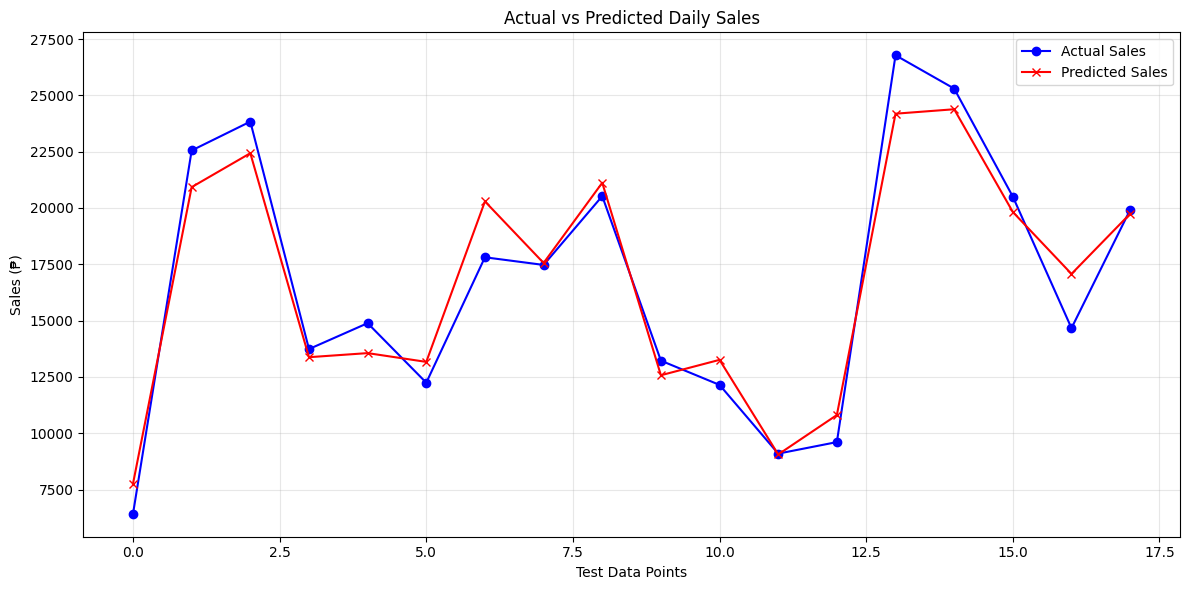

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Sales', marker='o', color='blue')
plt.plot(y_pred, label='Predicted Sales', marker='x', color='red')
plt.title("Actual vs Predicted Daily Sales")
plt.xlabel("Test Data Points")
plt.ylabel("Sales (₱)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()